
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>  No show appointments dataset contains some information about 100k medical appointments in Brazil. It contains few columns that would help us indicate whether or not patients show up for their appointment. for example :
thier ages,whether they have medical conditions like diabetes,handcap and others, if they recieved an SMS message or not...etc.


### Question for Analysis

> What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?



In [1]:
# import necessary packages :
# numpy for numerical operations , pandas for data manipulation
# matplotlib and seaborn for data visualization and EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)


In [14]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> In this section, I will do the following steps :

> (1) load the data (from csv file to dataframe)

> (2) explore and understand it : view some rows, extract average values, explore mistakes like (duplicates, missing values, logically incorrect values)

> (3) clean the dataset in order to be suitable for further exploration

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv',sep=',')
df.head(8) # print first 8 rows

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes


In [3]:
print('number of rows and columns respectively =',df.shape)

number of rows and columns respectively = (110527, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### there are no missing values in our dataset

In [4]:
type(df['ScheduledDay'][0])
type(df['AppointmentDay'][0])

str

#### further investigation for types of "ScheduledDay","AppointmentDay"  are strings, well will change them to datetime format later

In [5]:
print('Number of duplicates in our data : ',sum(df.duplicated()))

Number of duplicates in our data :  0


#### there are no duplicates found in the dataset

In [6]:
print('number of duplicates in patient id = ',sum(df['PatientId'].duplicated()))
print('number of unique patient id = ',df['PatientId'].nunique())

number of duplicates in patient id =  48228
number of unique patient id =  62299


#### 48228 patients had more than 1 appointment

In [7]:
sum(df.duplicated(['PatientId','No-show']))

38710

####  38710 patients' id with same showing up status, will be dropped later

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### some patients entered wrong age as we notice min age =-1
#### check rows with age = -1 :

In [9]:
age_mistake = df[df['Age']==-1]
age_mistake

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

#### handcap (number of medical conditions a patient may have)  values ranges from 0 to 4


### Data Cleaning


In [11]:
#drop mistake age then check
df.drop(df.index[99832],inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### now minimum age has changed from -1 to 0 

In [12]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

#### changed to datetime format

In [13]:
df.drop_duplicates(['PatientId','No-show'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71816 entries, 0 to 110524
Data columns (total 14 columns):
PatientId         71816 non-null float64
AppointmentID     71816 non-null int64
Gender            71816 non-null object
ScheduledDay      71816 non-null datetime64[ns]
AppointmentDay    71816 non-null datetime64[ns]
Age               71816 non-null int64
Neighbourhood     71816 non-null object
Scholarship       71816 non-null int64
Hipertension      71816 non-null int64
Diabetes          71816 non-null int64
Alcoholism        71816 non-null int64
Handcap           71816 non-null int64
SMS_received      71816 non-null int64
No-show           71816 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 8.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 

#### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28c53d1438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f289c1a27f0>]], dtype=object)

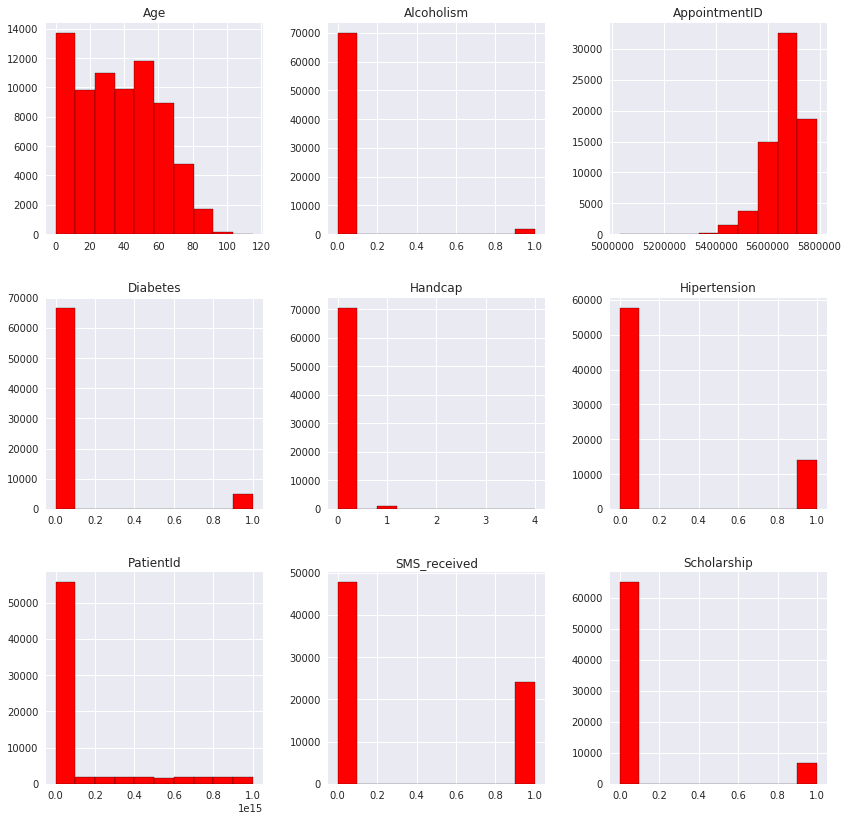

In [14]:
df.hist(figsize=(14,14),color='red',edgecolor='black')

#### general exploration to data using histogram : 
> most patients' ages range between 0:10 and 60:70 years old

> most patients are not infected by (alcholism,diabetes,handcap,hypertension)

> patients not recieving sms messages are double that recieved 

> most patients had not enroll to scholarship

In [15]:
show = df[df['No-show']=='No']
not_show = df[df['No-show']=='Yes']
print("Total patients showed up : \n",show.count())
print("Total patients didn't show up : \n",not_show.count())


Total patients showed up : 
 PatientId         54153
AppointmentID     54153
Gender            54153
ScheduledDay      54153
AppointmentDay    54153
Age               54153
Neighbourhood     54153
Scholarship       54153
Hipertension      54153
Diabetes          54153
Alcoholism        54153
Handcap           54153
SMS_received      54153
No-show           54153
dtype: int64
Total patients didn't show up : 
 PatientId         17663
AppointmentID     17663
Gender            17663
ScheduledDay      17663
AppointmentDay    17663
Age               17663
Neighbourhood     17663
Scholarship       17663
Hipertension      17663
Diabetes          17663
Alcoholism        17663
Handcap           17663
SMS_received      17663
No-show           17663
dtype: int64


PatientId         75.41
AppointmentID     75.41
Gender            75.41
ScheduledDay      75.41
AppointmentDay    75.41
Age               75.41
Neighbourhood     75.41
Scholarship       75.41
Hipertension      75.41
Diabetes          75.41
Alcoholism        75.41
Handcap           75.41
SMS_received      75.41
No-show           75.41
dtype: float64
PatientId         24.59
AppointmentID     24.59
Gender            24.59
ScheduledDay      24.59
AppointmentDay    24.59
Age               24.59
Neighbourhood     24.59
Scholarship       24.59
Hipertension      24.59
Diabetes          24.59
Alcoholism        24.59
Handcap           24.59
SMS_received      24.59
No-show           24.59
dtype: float64


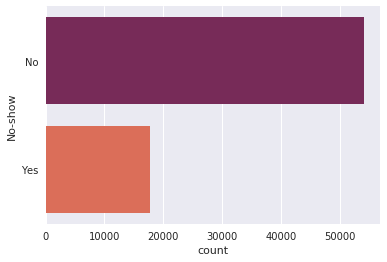

In [16]:
sns.countplot(y=df['No-show'],data = df,palette = 'rocket')
print(round(show.count()/(show.count()+not_show.count())*100,2))
print(round(not_show.count()/(show.count()+not_show.count())*100,2))

> 75% patients showed up and 24.59% didn't

In [17]:
#    find coorelations : diseases vs show or no show

def disease(column_name,title):
    # patient has a disease and showed up
    have_disease = df.query(' {} != 0'.format(column_name))["No-show"].value_counts()
    
    # patient does not have a disease and showed up 
    no_disease = df.query(' {} == 0'.format(column_name))["No-show"].value_counts()
    
    #visualize
    have_disease_show = have_disease["No"] / sum(have_disease)
    no_disease_show = no_disease["No"] / sum(no_disease)
    list1 = [have_disease_show, no_disease_show]
    plt.figure(figsize=(7,7))
    plt.bar([1,2], list1, tick_label=["have disease", "not have disease"],color=['powderblue','thistle'])
    plt.ylim((0.7,0.8))
    plt.title(title)
    plt.xlabel('disease')
    plt.ylabel('counts')
    plt.show()
    
    # get percentage people have disease showing up from total having disease
    p1 = round(have_disease_show*100)
    print("Patients that have the disease and showed up is about ",p1,'%')
    # get percentage people not have disease showing up from total not having disease
    p2 = round(no_disease_show*100)
    print("Patients that don't have the disease and showed up is about ",p2,'%')
    return

> This is a function that filters people showing up whether they have one of the disease or not (Diabetes,Hipertension,Alcoholism,Handcap) then plotting it and find thier percentages

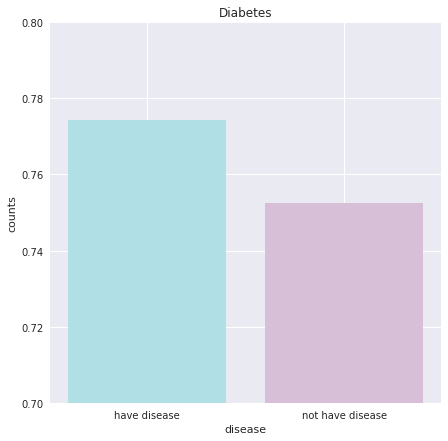

Patients that have the disease and showed up is about  77.0 %
Patients that don't have the disease and showed up is about  75.0 %


In [18]:
disease('Diabetes','Diabetes')

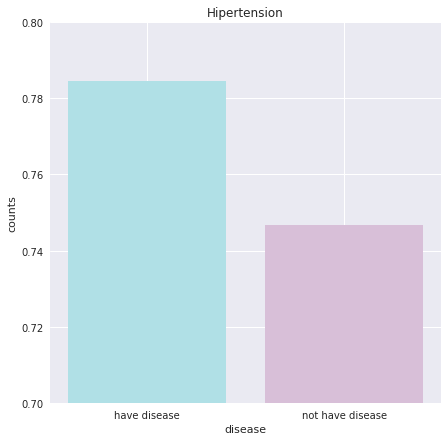

Patients that have the disease and showed up is about  78.0 %
Patients that don't have the disease and showed up is about  75.0 %


In [19]:
disease('Hipertension','Hipertension')

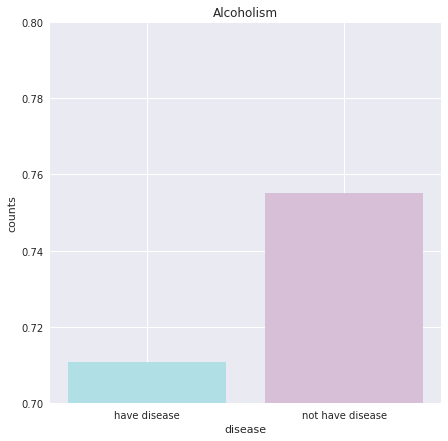

Patients that have the disease and showed up is about  71.0 %
Patients that don't have the disease and showed up is about  76.0 %


In [20]:
disease('Alcoholism','Alcoholism')

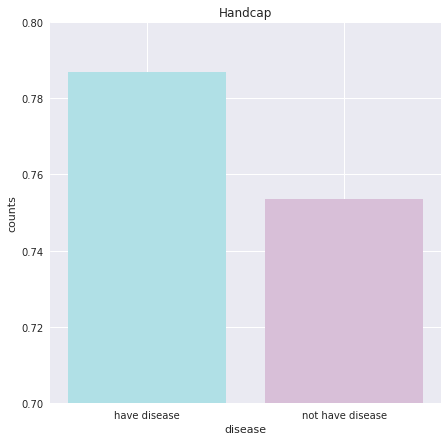

Patients that have the disease and showed up is about  79.0 %
Patients that don't have the disease and showed up is about  75.0 %


In [21]:
disease('Handcap','Handcap')

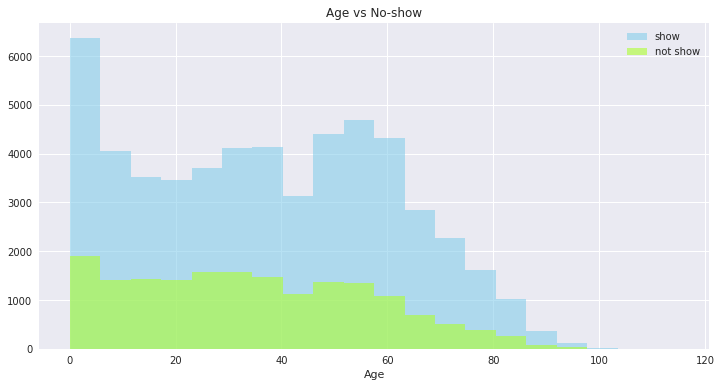

In [22]:
plt.figure(figsize=(12,6))
df[df['No-show']=='No']['Age'].hist(alpha=0.6, bins=20,label="show",color='skyblue')
df[df['No-show']=='Yes']['Age'].hist(alpha=0.6, bins=20,label="not show",color='greenyellow')
plt.legend();
plt.title("Age vs No-show")
plt.xlabel("Age")
plt.show()

> from histogram : most ages showing up 0:5 years and 50:60

In [23]:
gender = df.groupby("Gender")["No-show"].value_counts()
gender

Gender  No-show
F       No         34960
        Yes        11506
M       No         19193
        Yes         6157
Name: No-show, dtype: int64

> group and count genders by showing up

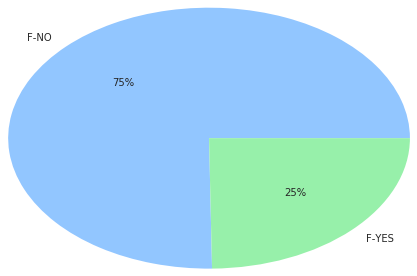

In [24]:
fem = gender.drop(gender.index[[2,3]]) # drop males
colors = sns.color_palette('pastel')
labels = ['F-NO','F-YES']
plt.pie(fem, colors = colors, autopct = '%0.0f%%',radius=1.5,labels=labels)
plt.show()


75% of females show_up

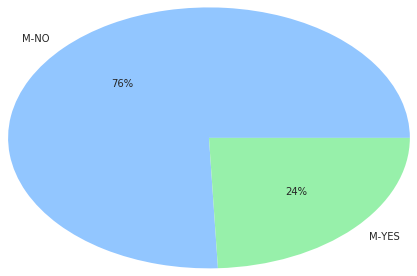

In [25]:
male = gender.drop(gender.index[[0,1]])
colors = sns.color_palette('pastel')
labels = ['M-NO','M-YES']
plt.pie(male, colors = colors, autopct = '%0.0f%%',radius=1.5,labels=labels)
plt.show()

> 76% of males show up

Text(0.5,1,'Males vs Females Comparison')

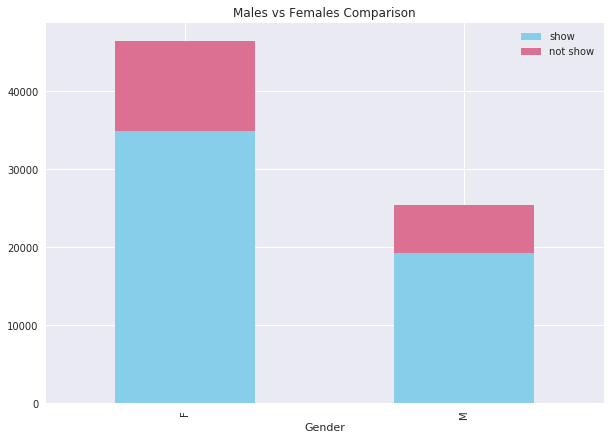

In [26]:
colors = ['skyblue','palevioletred']
gender.unstack().plot(kind="bar",stacked=True,figsize=(10,7),color=colors)
plt.legend(["show","not show"]);
plt.title("Males vs Females Comparison")

> By comparing both genders, we find that females had more appointments in general but still there is no direct coorelation between gender and showing up

In [27]:
sms = df.groupby("SMS_received")["No-show"].value_counts()
sms

SMS_received  No-show
0             No         38057
              Yes         9660
1             No         16096
              Yes         8003
Name: No-show, dtype: int64

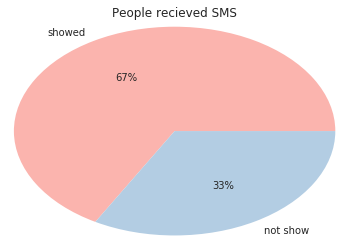

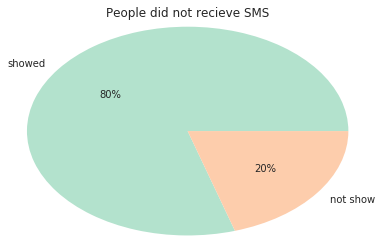

In [29]:
recieve = sms.drop(sms.index[[0,1]]) # people who recieved sms 
colors = sns.color_palette('Pastel1')
labels = ['showed','not show']
plt.pie(recieve, colors = colors, autopct = '%0.0f%%',radius=1.2,labels=labels)
plt.title('People recieved SMS')
plt.show()

not_recieve = sms.drop(sms.index[[2,3]]) # people who didn't recieve sms
colors = sns.color_palette('Pastel2')
labels = ['showed','not show']
plt.pie(not_recieve, colors = colors, autopct = '%0.0f%%',radius=1.2,labels=labels)
plt.title('People did not recieve SMS')
plt.show()


> although most people did not recieve sms messege, they show up more often than ones that actually recieved

In [19]:
n1 = df.Neighbourhood[df['No-show']=='Yes'].value_counts() 
n2 = df.Neighbourhood[df['No-show']=='No'].value_counts()

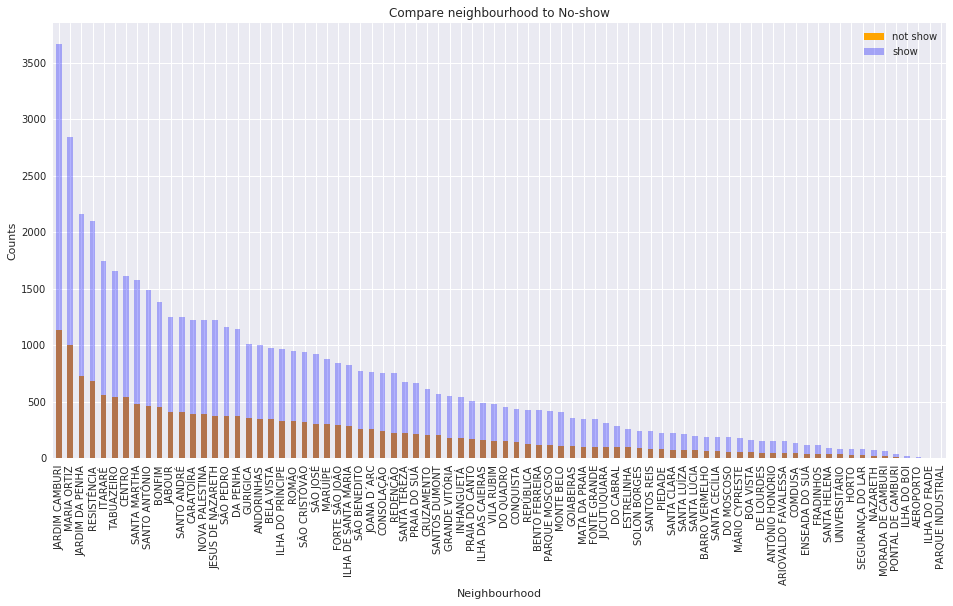

In [20]:
plt.figure(figsize=(16,8))
n1.plot.bar(label='not show',color='orange',alpha=1)
n2.plot.bar(label='show',color='blue',alpha=.3)
plt.legend()
plt.title('Compare neighbourhood to No-show')
plt.xlabel('Neighbourhood')
plt.ylabel('Counts')
plt.show()

> people in 'Jardim Camburi' and 'Maria Ortiz' had the most appointments and showed up the most

In [22]:
scholar = df.groupby("Scholarship")["No-show"].value_counts()
scholar

Scholarship  No-show
0            No         49207
             Yes        15748
1            No          4946
             Yes         1915
Name: No-show, dtype: int64

Text(0,0.5,'counts')

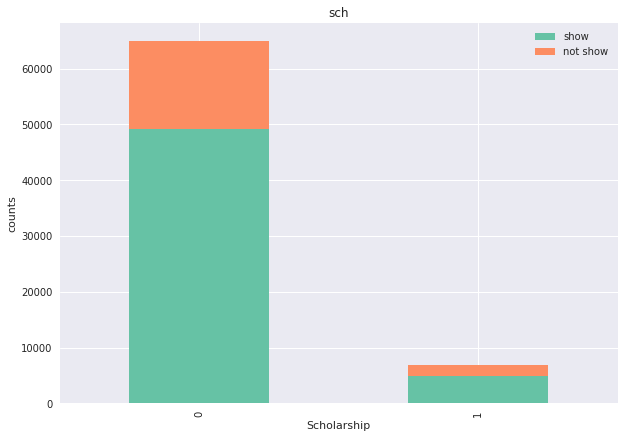

In [23]:
colors = sns.color_palette('Set2')
scholar.unstack().plot(kind="bar",stacked=True,figsize=(10,7),color=colors)
plt.legend(["show","not show"]);
plt.title("sch")
plt.ylabel('counts')

> although most patients did not enroll scholarship,they showed up more, no coorelation between scholarship and showing up

<a id='conclusions'></a>
## Conclusions

#### Factors affecting patients showing up are :
> Age : the children of ages 0:10 and the elderly in their 50's,60's and 70's show up the most 

> Neighbourhood : people in 'Jardim Camburi' and 'Maria Ortiz' had the most appointments and showed up the most

> So age and neighbourhood have great impacts on 'No-show'
other characateristics are not really affecting patients showing up

#### Limitaions :
> There are many columns in the dataset are not really necessary as they don't have direct coorelation with 'No-show' like gender, recieving sms , all diseases (handcap, diabetes, alchoholism, hipertension) , and scholarship

> although most people did not recieve sms messege, they show up more often than ones that actually recieved...Probably,there is something wrong with the sms messages

#### references i used : 

> https://stackoverflow.com/

> https://www.simplilearn.com/

> https://seaborn.pydata.org/


In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0